#Algoritmo de Bellman-Ford:

##1. Descripción del Problema:

Existe una inmensa cantidad de problemas aplicables para grafos, esto debido a su amplia representación de situaciones de la vida real, pero dentro de aquellos problemas uno de los más famosos vendría siendo el de encontrar el camino más corto. Este problema tiene algunas variantes, pero en este caso se considerará la variante que utiliza sólo un nodo fuente (o inicial).

Para aplicar este problema, se requiere de un grafo representativo que sea dirigido y cuyos arcos contengan costos o pesos, de esta forma el problema radica en encontrar una suma de arcos mínima entre 2 nodos que funcione como el camino más corto posible.

Sin embargo, no siempre es tan simple. Pueden darse casos donde el grafo, debido a la situación que representa, tiene arcos con costo negativo. Esto último puede afectar gravemente a ciertos algortimos que solucionan este problema, debido a que se podrían encontrar con un *ciclo negativo*, o sea, que el algoritmo vuelva a tomar un mismo camino que posee un arco con coste negativo de forma infinita, a modo de seguir disminuyendo la distancia mínima. Por lo tanto, es necesario que el algoritmo que resuelva este problema, pueda saber con exactitud cuando se produce un ciclo negativo, para así dejar de iterar cuando se dé el caso.

---

#### **Entradas y Salidas:**

**Entrada**: Un grafo dirigido $G=(V,E)$, un vértice fuente $s\in V$, y un valor real $l_e$ asociado a cada arco $e\in E$.

**Salida**: Una de las siguientes opciones:

1. La distancia más corta $dist(s,v)$ para cada vértice $v\in V$.
2. Una declaración indicando que $G$ contiene un ciclo negativo.

##2. Descripción del Algoritmo:

Existe un algoritmo que utiliza el paradigma de programación dinámica y es capaz de encontrar una solución correcta a la variante del problema antes mencionado. Se trata del algoritmo de Bellman-Ford.

---
###¿Cómo funciona?

Bellman-Ford es un algoritmo que a través de una subestructura óptima, separa el problema inicial de encontrar $dist(s,v)$ en varios sub-problemas más pequeños donde se encuentra la distancia mínima entre el nodo $s$ y algún otro nodo predecesor de $v$. De esta forma, comienza a descomponer los caminos posibles hasta llegar a un caso base. Finalmente, utilizando la estrategia bottom-up, el algoritmo resuelve los sub-problemas que más cortos, almacenando la información, y con estas soluciones termina resolviendo el problema inicial.

Este algoritmo representa el "tamaño" del subproblema a través de una variable $i$ que figura como la cantidad de arcos que se van a tomar en cuenta para construir un camino. Por lo que si $i = 2$ sólo se considerarán 2 arcos máximo para realizar una conexión entre dos vértices.

---
###Subestructura Óptima:

Al tener $dist(s,v)$ una cierta cantidad de nodos intermedios, y por ende, se necesita pasar por más de un arco, en lugar de buscar camino por camino, el algortimo determina que se puede obtener la distancia mínima entre $s$ y un nodo intermedio $w$, del cual se garantiza será el costo óptimo, y luego agregará el valor de $l$<sub>$wv$</sub> al costo total.

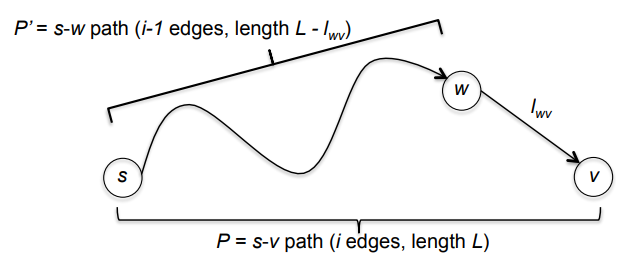

Escrito de manera más formal, la subestructura óptima quedaría expresada de la siguiente forma:

- $dist(s,v)$ = $dist(s,w)$ + $l$<sub>$wv$</sub>


---
###Función de Recurrencia:
Para obtener la solución a todos los sub-problemas involucrados, el algoritmo define una función de recurrencia que permite definir que valor se considerará mínimo. Esta función es la siguiente:

- $L_{i,v} =
\min \left\{
 \begin{array}{cc}
 L_{i-1,v} & \text{(case 1)} \\
 \min\limits_{(w,v)\in E} \{L_{i-1,w}+l_{wv}\} & \text{(case 2)}
    	\end{array}
\right\}$

El resultado a un problema de este estilo siempre será el valor mínimo encontrado entre 2 posibilidades. La expresión de abajo hace referencia a lo descrito en la subestructura óptima, se descompone el problema para obtener el valor mínimo. Sin embargo, no siempre resultará de la descomposición del problema el costo más bajo, puesto a que existen casos donde el resultado obtenido (el costo obtenido) en la "iteración" anterior (o sea, considerando una menor cantidad $i-1$ de arcos para formar un camino) represente un valor menor al que se obtiene con la "iteración" actual (camino formado con la subestructura y de $i$ arcos de tamaño). Para el caso anterior, como resultaría ser el valor mínimo posible para formar un camino entre los nodos involucrados, se conservaría el valor dejándolo como resultado del sub-problema.

**Caso Base**

Al ser una función de recurrencia que disminuye el valor de $i$ hasta $0$, es importante definir los casos base que utilizará el algoritmo. Estos son los siguientes:

- $L_{0,v} =
\left\{
\begin{array}{cc}
0 & \text{si $$s=v$$} \\
+\infty & \text{en otro caso.}
\end{array}
\right.$

El valor de $0$ se utiliza cuando se habla de la distancia de un nodo consigo mismo, ya que no es necesario encontrar un camino. Mientras tanto, el valor $∞+$ se utiliza para representar que no es posible encontrar un camino entre los nodos del problema/sub-problema debido a que no hay suficiente cantidad de arcos para conectar ambos. El caso base se considera cuando $i = 0$, o sea, cuando se tienen $0$ arcos para conectar y encontrar un camino entre $s$ y todos los nodos del grafo.

---
###Pasos a seguir:

El algoritmo Bellman-Ford cumple con los siguientes pasos para encontrar la solución al problema:

1. La función recibe un grafo $G$ dirigido y con pesos en los arcos, un vértice inicial $s$ y la cantidad de nodos.

2. Crear un arreglo de distancias de tamaño $V$ = cantidad de nodos, para almacenar el costo mínimo del camino de $s$ hasta cada nodo. Esto se construye de modo que la indexación coincida con la cantidad de arcos que se utilizen para encontrar un camino.

3. Inicializar el caso base $i = 0$ para cada vértice. Se asignará al arreglo de distancias el valor $0$ o $∞+$.

4. En un ciclo while o for iterar desde $0$ hasta $i-1$, se considera a este ciclo como el indicador de cuantos arcos se puede utilizar para construir el camino más corto.

  4.1. Obtener el nodo que coincide en la indexación con $i$.
  
  4.2. Iterar de forma anidada por cada arco del nodo.
    
  4.2.1. Utilizar la subestructura óptima y la función de recurrencia para saber si el arco actual es un mínimo. Se debe comparar con el valor almacenado en el arreglo de distancias, y en el caso de que se cumpla la relación para que sea un valor mínimo el encontrado, se reemplaza el valor del arreglo por el de la función.
  
5. Recorrer todos los arcos verificando si existe algún ciclo negativo, para ello, se vuelve a hacer uso de la subestructura óptima.

6. Retornar el arreglo de distancias.

---
###Ejemplo de Ejecución:

A continuación se muestra una tabla de datos que contiene como resultado el nodo predecesor y el costo mínimo para formar un camino.


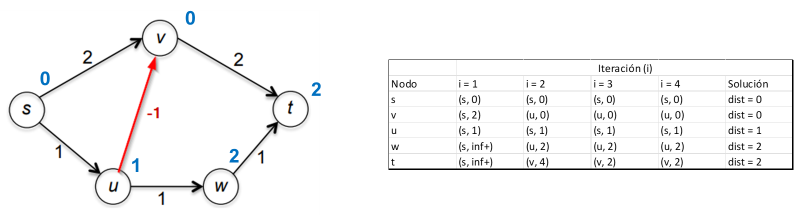

##3. Implementación del algoritmo:




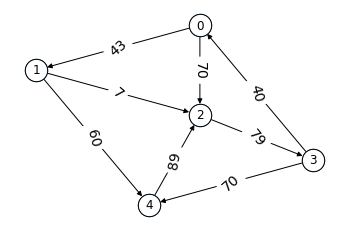

In [67]:
#@title Crear un grafo dirigido y con pesos: 
import random

def is_valid_edge(generated_edges: dict, i: int, j: int):
    return i != j and not generated_edges.get((i, j), None) and not generated_edges.get((j, i), None)

def instance_generator(n: int):
    """
        Input: cantidad de vértices
        Output: una lista que contiene todos los arcos y el número del vértice fuente (la función retorna dos variables).
        Los arcos vienen en la forma (i, j, weight), donde i es el vértice origen del arco y j el vértice al que apunta el arco, mientras que weight es su peso.
    """
    graph = []
    nodes = random.sample(range(0, n), n)
    unvisited_nodes = random.sample(range(0, n), n)
    
    generated_edges = {}
    for i in nodes:
        rand = random.sample(nodes, random.randint(1, 3))

        for j in rand:
            edge = (i, j)
            edge_with_weight = (i, j, random.randint(1, 100))
            
            if generated_edges.get((edge[1], edge[0]), None):
                continue
            
            if i == j:
                new_vertice = None
                iterations = 0
                while new_vertice is None and iterations < 250:
                    iterations += 1
                    number = random.randint(0, n - 1)
                    if is_valid_edge(generated_edges, i, number):
                        new_vertice = number

                if iterations >= 250:
                    return instance_generator(n)
                
                edge = (i, new_vertice)
                edge_with_weight = (i, new_vertice, random.randint(-25, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
            
            graph.append(edge_with_weight)
            generated_edges[edge] = edge

            if edge_with_weight[1] in unvisited_nodes:
                unvisited_nodes.remove(edge_with_weight[1])

    for i in unvisited_nodes:
        valid_edge = False
        iterations = 0
        while not valid_edge and iterations < 250:
            iterations += 1
            m = random.randint(0, n - 1)
            if is_valid_edge(generated_edges, m, i):
                valid_edge = True
                edge = (m, i)
                edge_with_weight = (m, i, random.randint(-25, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
                graph.append(edge_with_weight)
                generated_edges[edge] = edge

        if iterations >= 250:
            return instance_generator(n)

    return graph, graph[0][0], n


In [ ]:
#@title Dibujar un grafo:
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout

def graph_to_nxdigraph(graph: list, n: int):
    """
        Input: Un grafo en formato list[tuple]. Ej: [(0, 1, 10), (1, 2, 15), (2, 0, 7)].
        Output: Un nx.DiGraph de la libreria networkx.
    """
    nxdigraph = nx.DiGraph()
    [nxdigraph.add_node(i) for i in range(n)]

    for v in graph:
        nxdigraph.add_edge(v[0], v[1], weight=v[2])

    return nxdigraph


def dibujarGrafo (T):
  #Calcular Posiciones de los nodos
  pos = graphviz_layout(T, prog="dot")
  # para mostrar los arcos con sus etiquetas
  labels = nx.get_edge_attributes(T,'weight')
  nx.draw_networkx_edge_labels(T,pos,edge_labels=labels,font_size=14)
  #Dibujar el grafo
  nx.draw(T,pos, with_labels=True, node_size=500)
  nodes = nx.draw_networkx_nodes(T, pos, node_size=500, node_color="white")
  nodes.set_edgecolor('black')

Grafo: [(0, 2, 70), (0, 1, 43), (1, 4, 60), (1, 2, 7), (3, 0, 40), (3, 4, 70), (4, 2, 53), (4, 2, 89), (2, 3, 79)]
Nodo Inicial: 0
----------------------
Nodo Inicial: 0
Distancia 0 ---> 0 = 0 con None como predecesor de 0
Distancia 0 ---> 1 = 43 con 0 como predecesor de 1
Distancia 0 ---> 2 = 50 con 1 como predecesor de 2
Distancia 0 ---> 3 = 129 con 2 como predecesor de 3
Distancia 0 ---> 4 = 103 con 1 como predecesor de 4

Grafo utilizado:



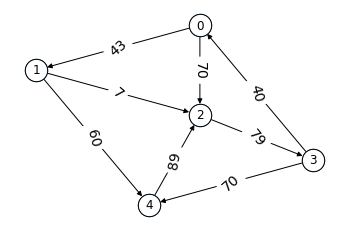

In [73]:
#@title Implementación Bellman-Ford:
def Bellman_Ford (G, s, n):
  #Crear un arreglo auxiliar de distancias para almacenar el costo para llegar a cada nodo.
  distancias = [float("Inf")] * n
  predecesor = [None] * n #Arreglo auxiliar de predecesores.
  distancias[s] = 0 #Caso Base

  #Recorrer cada vértice.
  for i in range (0, n): 
    #Recorrer cada arco.
    for j in range (len(G)):
      #Aplicar la subestructura óptima.
      auxDist = distancias[G[j][0]] + G[j][2]
      if auxDist < distancias[G[j][1]]:
        distancias[G[j][1]] = auxDist
        predecesor[G[j][1]] = G[j][0]
  
  #Verificar si hay un ciclo negativo.
  for k in range (len(G)): #Recorrer cada arco.
    if distancias[G[k][0]] != float("Inf") and distancias[G[k][0]] + G[k][2] < distancias[G[k][1]]:
      print("Existe un ciclo negativo")
      return None, None
    
  return distancias, predecesor

def printRespuesta (G, d, p, vertex):
  print("Nodo Inicial:", vertex)
  for i in range (len(d)):
    print(f"Distancia {vertex} ---> {i} = {d[i]} con {p[i]} como predecesor de {i}")

#Ejemplo
n = 5
G, vertex, n = instance_generator(n)
print(f"Grafo:", G)
print("Nodo Inicial:", vertex)
print("----------------------")
d, p = Bellman_Ford(G, vertex, n)
if d:
  printRespuesta(G, d, p, vertex)
  Gd = graph_to_nxdigraph(G,n)
  print("\nGrafo utilizado:\n")
  dibujarGrafo(Gd)

Grafo: [(4, 2, 96), (4, 0, 97), (4, 1, 15), (2, 3, 91), (2, 0, 18), (3, 1, -20), (3, 4, 58), (0, 1, 25), (0, 1, 83)]
Nodo Inicial: 4
---> Crear un arreglo auxiliar de distancias: [inf, inf, inf, inf, 0]
---> Crear un arreglo auxiliar para almacenar el nodo predecesor (intermedio): [None, None, None, None, None]
Cantidad de arcos máxima para formar un camino: 0
Arco a verificar: (4,2) 
Subestructura óptima: inf + 96 < inf 
Se encontró un nuevo mínimo: 96
------------------------------------------
Arco a verificar: (4,0) 
Subestructura óptima: inf + 97 < inf 
Se encontró un nuevo mínimo: 97
------------------------------------------
Arco a verificar: (4,1) 
Subestructura óptima: inf + 15 < inf 
Se encontró un nuevo mínimo: 15
------------------------------------------
Arco a verificar: (2,3) 
Subestructura óptima: inf + 91 < inf 
Se encontró un nuevo mínimo: 187
------------------------------------------
Arco a verificar: (2,0) 
Subestructura óptima: 97 + 18 < 97 
-----------------------

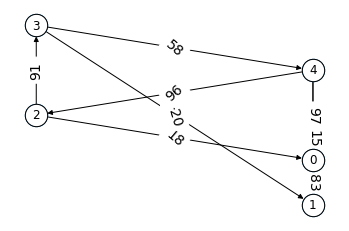

In [115]:
#@title Implementación con `verbose = True` y `visualize = True`:
from termcolor import cprint

def Bellman_Ford (G, s, n, verbose):
  #Crear un arreglo auxiliar de distancias para almacenar el costo para llegar a cada nodo.
  distancias = [float("Inf")] * n
  predecesor = [None] * n #Arreglo auxiliar de predecesores.
  distancias[s] = 0 #Caso Base
  if verbose == True:
    cprint("---> Crear un arreglo auxiliar de distancias:", "yellow", end=' ')
    cprint(f"{distancias}", "yellow", attrs=['bold'])
    cprint("---> Crear un arreglo auxiliar para almacenar el nodo predecesor (intermedio):", "blue", end=' ')
    cprint(f"{predecesor}", "blue", attrs=['bold'])

  #Recorrer cada vértice.
  for i in range (0, n):
    if verbose == True:
      cprint(f"Cantidad de arcos máxima para formar un camino: {i}", "red", attrs=['bold'])
    #Recorrer cada arco.
    for j in range (len(G)):
      if verbose == True:
        cprint(f"Arco a verificar: ({G[j][0]},{G[j][1]}) ", "pink", attrs=['bold'])
      #Aplicar la subestructura óptima.
      auxDist = distancias[G[j][0]] + G[j][2]
      if verbose == True:
        cprint(f"Subestructura óptima: {distancias[G[j][1]]} + {G[j][2]} < {distancias[G[j][1]]} ", "green", attrs=['bold'])
      if auxDist < distancias[G[j][1]]:
        if verbose == True:
          cprint(f"Se encontró un nuevo mínimo: {auxDist}", "green", attrs=['bold'])
        distancias[G[j][1]] = auxDist
        predecesor[G[j][1]] = G[j][0]
      cprint("------------------------------------------", "pink")
    cprint("------------------------------------------", "red")
  
  #Verificar si hay un ciclo negativo.
  for k in range (len(G)): #Recorrer cada arco.
    if distancias[G[k][0]] != float("Inf") and distancias[G[k][0]] + G[k][2] < distancias[G[k][1]]:
      print(distancias[G[k][0]] + G[k][2])
      print(distancias[G[k][1]])
      print("Existe un ciclo negativo")
      return None, None
    
  return distancias, predecesor

def printRespuesta (G, d, p, vertex, visualize):
  print("Nodo Inicial:", vertex)
  for i in range (len(d)):
    print(f"Distancia {vertex} ---> {i} = {d[i]} con {p[i]} como predecesor de {i}")
  if visualize == True:
    Gd = graph_to_nxdigraph(G,n)
    print("\nGrafo utilizado:\n")
    dibujarGrafo(Gd)

#Ejemplo
n = 5
G, vertex, n = instance_generator(n)
print(f"Grafo:", G)
print("Nodo Inicial:", vertex)
print("=============================================")
d, p = Bellman_Ford(G, vertex, n, True)
print("=============================================")
if d:
  printRespuesta(G, d, p, vertex, True)

##4. Correctitud del Algoritmo:

Para probar la correctitud del algoritmo de Bellman-Ford se utilizará inducción matemática, además de utilizar la subestructura óptima para fundamentar las afirmaciones a presentar.

Primero que nada, se plantea la pregunta: ¿Es posible encontrar la ruta más corta en un grafo con arcos negativos?, en base a esto se da la siguiente hipótesis:

$Hipótesis:$ *Si es posible encontrar una ruta óptima aplicando programación dinámica entonces también se puede encontrar el **camino más corto** pasando por todos los nodos del grafo.*

Dado la hipótesis anterior, se establece el siguiente **teorema**.

$Teorema:$ *Cualquier grafo sin ciclos negativos, tiene un camino mínimo de un nodo fuente $s$ a cada nodo de un grafo $G = (V,E)$.*

En base al teorema, se plantea el siguiente lema que ayudará a explicar la correctitud del algoritmo.

$Lema:$

Para $k$ iteraciones en un ciclo con un nodo fuente $s$ en un grafo $G$, se puede decir lo siguiente:

* Si la distancia de un nodo $u$ no es infinito (hay ruta), entonces es igual a la distancia de un camino de $s$ a $u$, puesto que es posible calcular dicho camino.

Si no se tiene este punto, no se podría establecer el siguiente, puesto que al no existir camino, no es posible afirmar que hay un camino más corto entre nodos. En base a lo anterior, se mantiene que:

* Si hay al menos $k$ aristas para un camino de $s$ a $u$, entonces la distancia en $u$ tiene como máximo la suma de las distancias para $k$ aristas para el camino más corto.

###Prueba del teorema

Ya establecido que un grafo tiene un camino más corto al no poseer ciclos negativos, a continuación se explica como el algoritmo resuelve el problema y cual es la lógica que sigue. Para ello, se utilizará la subestructura optima.

En base a un grafo $G=(V,E)$, con vértice o nodo fuente $s$, se afirma lo siguiente:

Sea $P(1)$ un caso base, para el nodo fuente $s$ y un nodo arbitrario $w$, se itera sobre:

* La distancia del nodo $s$ a si mismo es 0, por ende, la hipótesis es verdadera para este caso.

* La distancia del nodo $s$ a un nodo arbitrario $w$ es infinito, lo que significa que no posee conexión con el nodo fuente $s$, lo cual también cumple con la hipótesis.

Estos son los casos base establecidos en la subestructura óptima, los cuales sirven para mostrar por inducción porque el algoritmo es correcto.

Para $P(m)$ pasos con $m < n - 1$ el paso inductivo y $n$ el número de nodos en $m$ iteraciones, para encontrar el camino más corto, el algoritmo realiza el siguiente análisis:

1. Si en cada iteración, la distancia $l_{m-1}$ del vértice fuente $s$ a un nodo arbitrario $w$ se forma por $m-1$ arcos, entonces significa que no hay más rutas óptimas a encontrar, debido a que es ella misma, entonces se mantiene el valor.

2. Si no se da el caso anterior, significa que la distancia $l_m$ óptima se puede componer del valor $l_{m-1}$ con $m-1$ arcos (una ruta óptima que va de $s$ a $w$) más la distancia a encontrar $l_{w-(m-1)}$ que va desde $w$ hasta el nodo $v$.

También se debe considerar que al momento de hacer la primera "relajación" el algoritmo busca la distancia miníma en el grafo, si en otra parte del código se realiza otra relajación y el algoritmo puede volver a disminuir la distancia de un nodo a otro, significa que encontro un ciclo negativo, por ello, el algoritmo sabe tratar estos casos. 

Finalmente, se establece mediante inducción, que para cada iteración en un grafo $G$ el algoritmo encuentra una ruta óptima a cada nodo, esto se logra haciendo un análisis de la subestructura óptima, y por ello, es posible afirmar que el algoritmo de Bellman-Ford es correcto.

##5. Tiempo de Ejecución:

A continuación se realizará un análisis al algoritmo de Bellman-Ford para conseguir el tiempo de ejecución:

###Bellman-Ford:

Analizando cada paso del algoritmo:

- En el primer paso se crea un arreglo de distancias y otro de predecesores. Para el arreglo de distancias se debe asignar un valor inicial que indica el caso base del algoritmo. Este paso requiere $V$ pasos ($V$ = cantidad de nodos en el grafo), por lo que tiene una complejidad temporal de $O(V).

- Luego se inicia un ciclo que debe recorrer los nodos del grafo ($V$ pasos), y a su vez, se inicia un ciclo anidado que recorre todos los arcos del vértice actual ($E$ pasos, $E$ = cantidad de arcos en el grafo). Dentro de este último ciclo, se realiza un proceso para obtener una distancia mínima utilizando la subestructura óptima, pero como todas las operaciones del procedimiento son de complejidad $O(1)$, entonces la complejidad temporal de este paso se reduce a $O(V*E)$, 

- El tercer y último paso del algoritmo recorre una vez más los arcos del grafo ($E$ pasos), para realizar un proceso de verificación que se asegure que no hayan ciclos negativos en el arco. El procedimiento anteriormente mencionado es de complejidad constante $O(1)$, por lo que este paso tendrá una complejidad de $O(E)$.

Teniendo analizados los pasos de este algoritmo, se obtiene una fórmula final para sacar el tiempo de ejecución. Esta sería:

 - $T(n) = O(V) + O(V*E) + O(E) = O(V*E).$

Se concluye que Bellman-Ford posee un tiempo de ejecución de $O(V*E)$.

##6. Experimentación:

In [133]:
#@title Bellman-Ford a utilizar:
def Bellman_Ford_Base (G, s, n):
  #Crear un arreglo auxiliar de distancias para almacenar el costo para llegar a cada nodo.
  distancias = [float("Inf")] * n
  predecesor = [None] * n #Arreglo auxiliar de predecesores.
  distancias[s] = 0 #Caso Base

  #Recorrer cada vértice.
  for i in range (0, n): 
    #Recorrer cada arco.
    for j in range (len(G)):
      #Aplicar la subestructura óptima.
      auxDist = distancias[G[j][0]] + G[j][2]
      if auxDist < distancias[G[j][1]]:
        distancias[G[j][1]] = auxDist
        predecesor[G[j][1]] = G[j][0]
  
  #Verificar si hay un ciclo negativo.
  for k in range (len(G)): #Recorrer cada arco.
    if distancias[G[k][0]] != float("Inf") and distancias[G[k][0]] + G[k][2] < distancias[G[k][1]]:
      # print(distancias[G[k][0]] + G[k][2])
      # print(distancias[G[k][1]])
      # print("Existe un ciclo negativo")
      return None, None
    
  return distancias

#Ejemplo
n = 5
G, vertex, n = instance_generator(n)
d = Bellman_Ford(G, vertex, n)

In [130]:
#@title Función para ejecutar el algoritmo con los datos del experimento:
def funcionEspecial(n):
  g,av,n = instance_generator(n)
  dist = Bellman_Ford_Base(g,av,n)

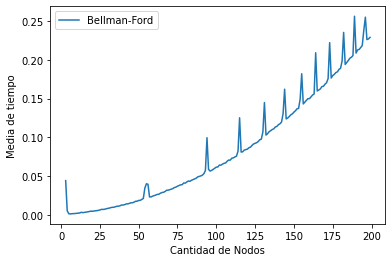

In [135]:
#@title Experimento de tiempo Promedio:
from matplotlib import cm
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import numpy as np

x=[]; y=[]
for n in range(3,200):
  z = repeat(setup="from __main__ import funcionEspecial", stmt=f"funcionEspecial({n})", repeat=25, number=10)
  sum = 0
  for i in range(len(z)):
    sum += z[i]
  prom = sum/25
  x.append(n)
  y.append(prom)

plt.plot(x,y)
plt.legend(["Bellman-Ford"])

plt.xlabel('Cantidad de Nodos')
plt.ylabel('Media de tiempo')
plt.show()

**Análisis**: Se puede observar un crecimiento cuadrático en la gráfica a medida que aumenta la cantidad de nodos, sin embargo, también posee algunos *peaks* de tiempo en ciertos espacios.

**Explicación**: Esto se puede deber a que la complejidad temporal es $O(V*E)$, más específicamente, debido a que la cantidad de arcos es a los menos $V-1$, y en el peor caso habrían $V^2$. Por lo tanto, al reemplazar en la fórmula del tiempo de ejecución, se observaría una tendencia en el resultado a $V^2$. Los *peaks* de tiempo se pueden deber a problemas de la máquina al procesar los datos.